### Model Sentimen 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def map_sentiment(sentiment):
    if sentiment == 1:
        return 'positif'
    elif sentiment == 0:
        return 'netral'
    else:
        return 'negatif'

In [3]:
def prepare_datasets(corpus, labels, test_data_proportion=0.3, random_state=42):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels,
                                                        test_size=test_data_proportion,
                                                        random_state=random_state)
    return train_X, test_X, train_Y, test_Y

In [4]:
def tfidf_extractor(corpus, ngram_range=(1,2)):
    vectorizer = TfidfVectorizer(min_df=1,
                                norm='l2',
                                smooth_idf=True,
                                use_idf=True,
                                ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [5]:
def plot_training_model_loss(clf, iterations, X, y):
    losses = []
    for i in range(iterations):
        clf.partial_fit(X, y, classes=np.unique(y))
        decision = clf.decision_function(X)
        hinge_loss = np.mean(np.maximum(0, 1 - decision[np.arange(len(y)), y]))
        losses.append(hinge_loss)
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), losses, label='Training Loss')
    plt.title('Training Model')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [6]:
df = pd.read_csv('sentiment_3000.csv')
df['sentimen'] = df['sentimen'].map(map_sentiment)
df.head(10)

,content,sentimen
0,bacapres koalisi perubahan anies baswedan berb...,positif
1,bacapres koalisi indonesia maju kim prabowo su...,positif
2,bacapres koalisi indonesia maju kim prabowo su...,positif
3,bacapres koalisi perubahan persatuan anies bas...,positif
4,capres mahfud md optimistis ppp parlemen tahun...,positif
5,cawapres koalisi perubahan muhaimin iskandar c...,positif
6,bacapres koalisi pdip ganjar pranowo menanggap...,positif
7,capres koalisi pdip ganjar pranowo khawatir su...,positif
8,capres ganjar pranowo mengaku khawatir preside...,positif
9,capres koalisi perubahan anies baswedan presid...,positif


In [7]:
# Split data
x_train, x_test, y_train, y_test = prepare_datasets(df['content'], df['sentimen'], test_data_proportion=0.3)

In [8]:
# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure the lengths match after splitting
y_train_encoded = y_train_encoded[:len(x_train)]
y_test_encoded = y_test_encoded[:len(x_test)]

In [9]:
# TF-IDF Vectorization
tfidf_vectorizer, tfidf_train_features = tfidf_extractor(x_train)
tfidf_test_features = tfidf_vectorizer.transform(x_test)

In [10]:
print("Shape of tfidf_train_features:", tfidf_train_features.shape)
print("Length of y_train_encoded:", len(y_train_encoded))

Shape of tfidf_train_features: (2100, 155800)
Length of y_train_encoded: 2100


In [11]:
print("Shape of tfidf_test_features:", tfidf_test_features.shape)
print("Length of y_test_encoded:", len(y_test_encoded))

Shape of tfidf_test_features: (900, 155800)
Length of y_test_encoded: 900


In [12]:
# Model training with specified number of iterations
clf = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)
clf.partial_fit(tfidf_train_features, y_train_encoded, classes=np.unique(y_train_encoded))

SGDClassifier()

In [13]:
# Predictions
clf_pred = clf.predict(tfidf_test_features)

# Accuracy
clf_accuracy = accuracy_score(y_test_encoded, clf_pred)
print("Accuracy:", clf_accuracy)

Accuracy: 0.6711111111111111


In [14]:
# Classification Report
report = classification_report(y_test_encoded, clf_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     negatif       0.67      0.63      0.65       269
      netral       0.72      0.68      0.70       343
     positif       0.62      0.70      0.66       288

    accuracy                           0.67       900
   macro avg       0.67      0.67      0.67       900
weighted avg       0.67      0.67      0.67       900



<Figure size 800x600 with 0 Axes>

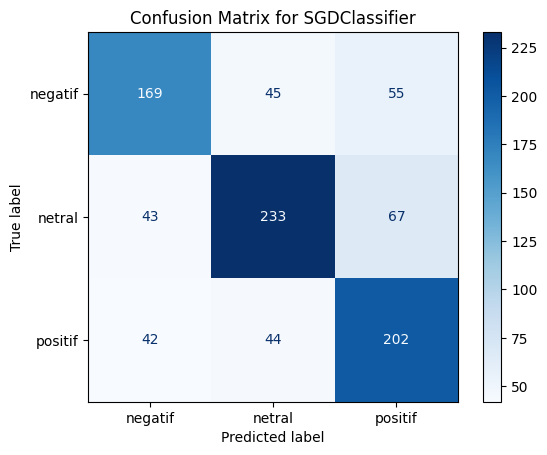

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, clf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SGDClassifier')
plt.show()

## Naiye Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [17]:
# Train Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train_features, y_train_encoded)

MultinomialNB()

In [18]:
# Predictions
nb_pred = nb_classifier.predict(tfidf_test_features)

# Accuracy
nb_accuracy = accuracy_score(y_test_encoded, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.5955555555555555


In [19]:
# Classification Report
nb_report = classification_report(y_test_encoded, nb_pred, target_names=label_encoder.classes_)
print("Naive Bayes Classification Report:\n", nb_report)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

     negatif       0.71      0.46      0.56       269
      netral       0.52      0.90      0.66       343
     positif       0.77      0.35      0.48       288

    accuracy                           0.60       900
   macro avg       0.67      0.57      0.57       900
weighted avg       0.66      0.60      0.58       900



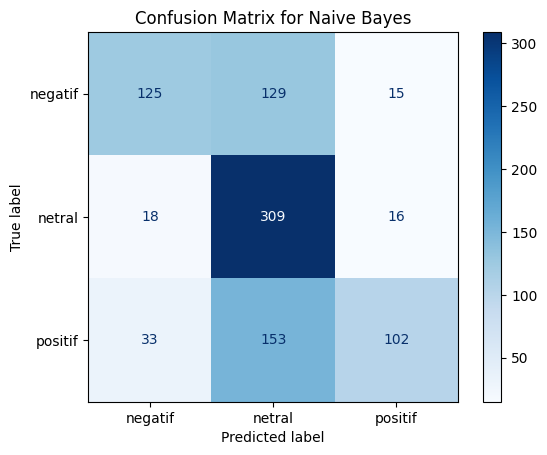

In [20]:
# Plot confusion matrix
nb_confusion_matrix = confusion_matrix(y_test_encoded, nb_pred)
nb_display = ConfusionMatrixDisplay(confusion_matrix=nb_confusion_matrix, display_labels=label_encoder.classes_)
nb_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

## SVM

In [21]:
from sklearn.svm import SVC

In [22]:
# Train SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(tfidf_train_features, y_train_encoded)


SVC(kernel='linear')

In [23]:
# Predictions
svm_pred = svm_classifier.predict(tfidf_test_features)

# Accuracy
svm_accuracy = accuracy_score(y_test_encoded, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6922222222222222


In [24]:
# Classification Report
svm_report = classification_report(y_test_encoded, svm_pred, target_names=label_encoder.classes_)
print("SVM Classification Report:\n", svm_report)

SVM Classification Report:
               precision    recall  f1-score   support

     negatif       0.67      0.67      0.67       269
      netral       0.71      0.75      0.73       343
     positif       0.69      0.65      0.67       288

    accuracy                           0.69       900
   macro avg       0.69      0.69      0.69       900
weighted avg       0.69      0.69      0.69       900



<Figure size 800x600 with 0 Axes>

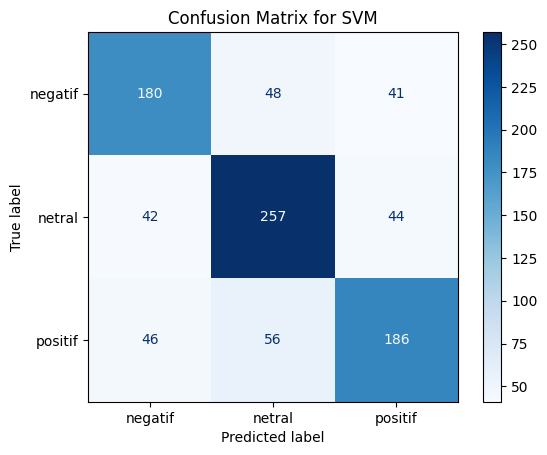

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix for SVM
svm_confusion_matrix = confusion_matrix(y_test_encoded, svm_pred)

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_confusion_matrix, display_labels=label_encoder.classes_)
svm_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.show()